In this notebook we try to replicate [Discovering Conservation Laws using Optimal Transport and Manifold Learning](https://doi.org/10.48550/arxiv.2208.14995).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

### Generate trajectories

In [2]:
%mkdir -p trajectories/coupled_oscillator
%mkdir -p trajectories/double_pendulum
%mkdir -p trajectories/harmonic_oscillator
%mkdir -p trajectories/pendulum
%mkdir -p trajectories/kepler_problem
%mkdir -p trajectories/three_body_problem

ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.
ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.
ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.
ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.
ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.
ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.



Creating trajectories for pendulum


1000it [00:42, 23.72it/s]



Creating trajectories for harmonic_oscillator


1000it [00:01, 572.84it/s]



Creating trajectories for kepler_problem


1000it [00:03, 271.27it/s]



Creating trajectories for double_pendulum


1000it [18:14,  1.09s/it]



Creating trajectories for coupled_oscillator


1000it [00:07, 140.25it/s]


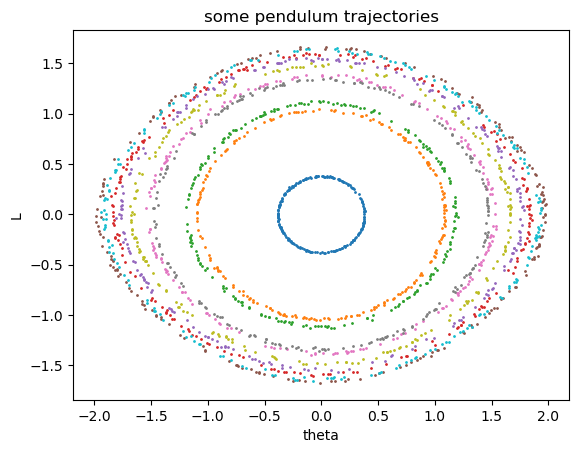

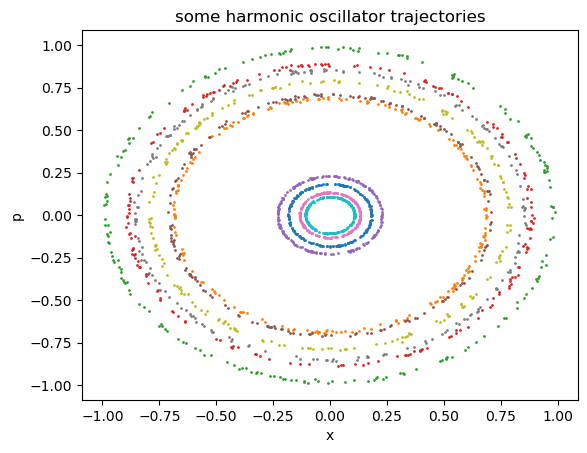

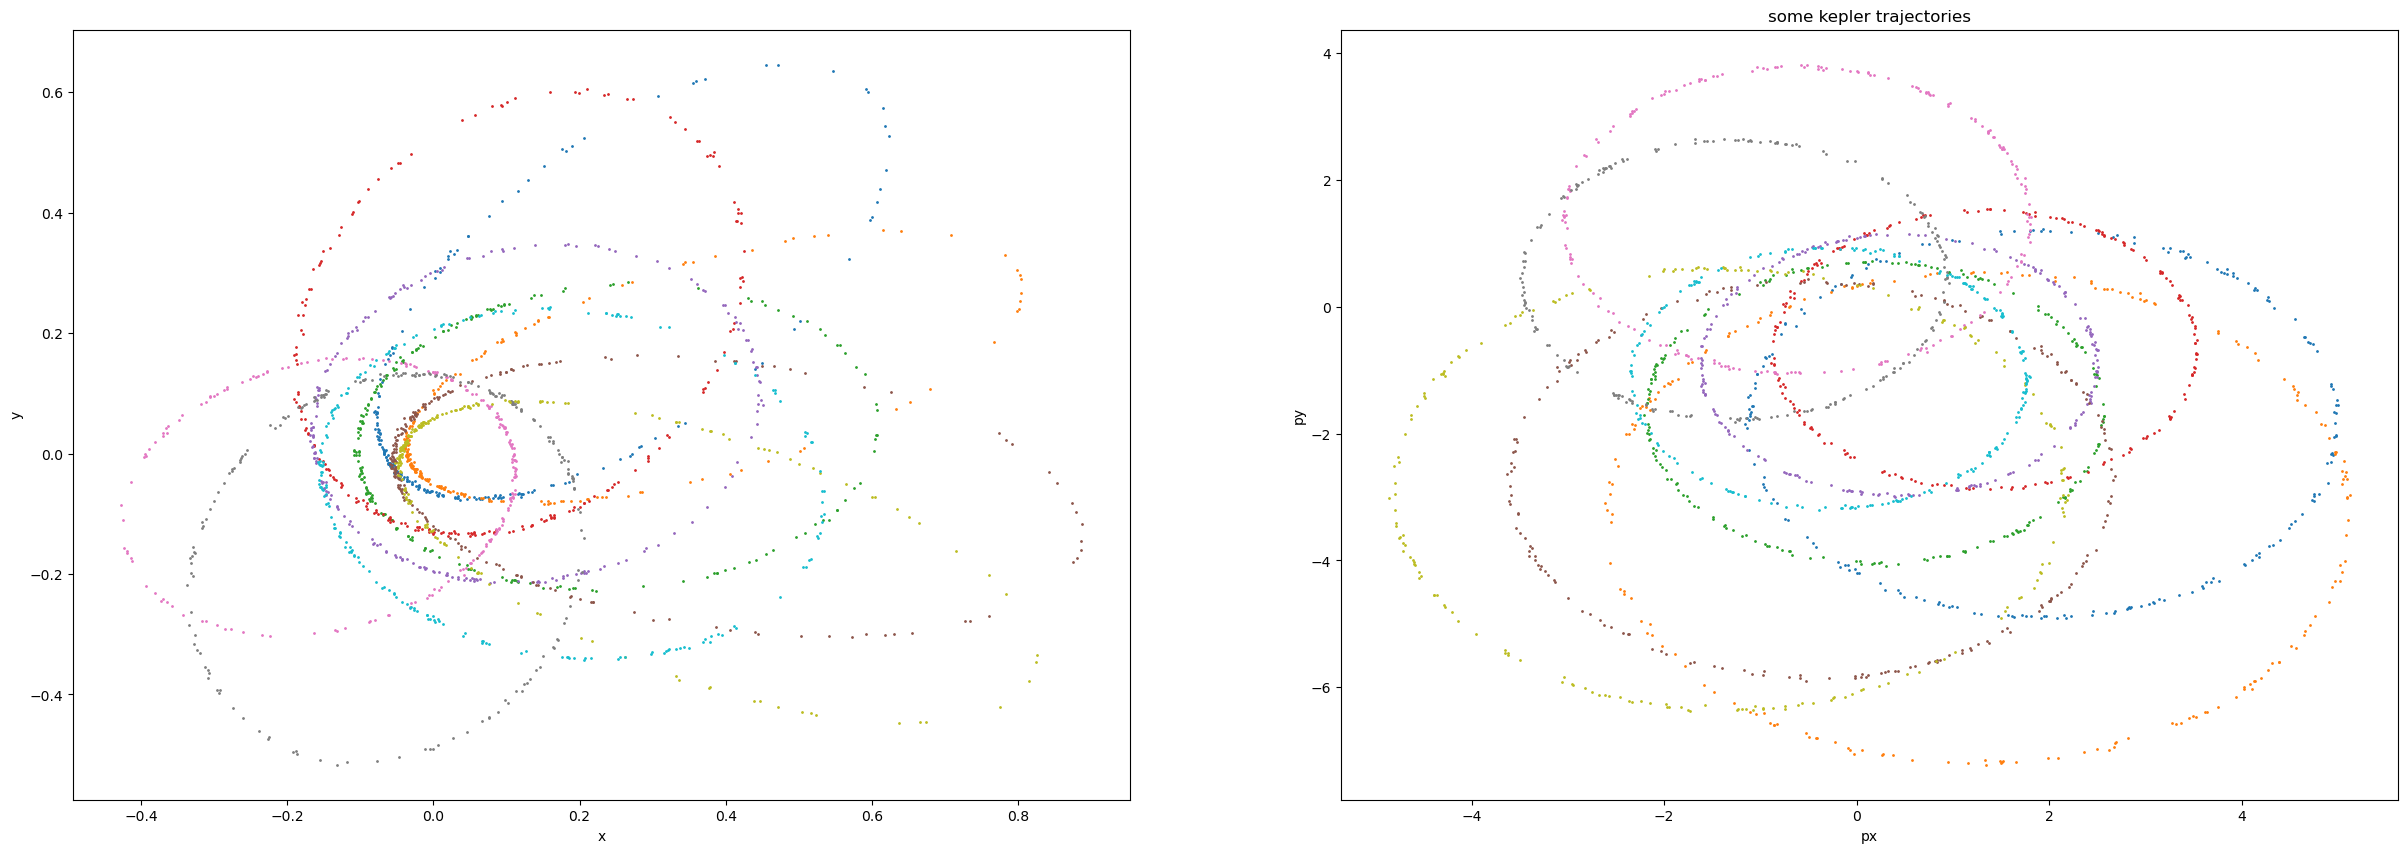

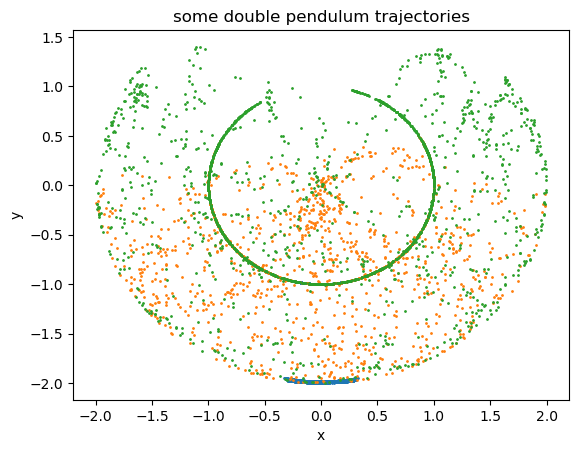

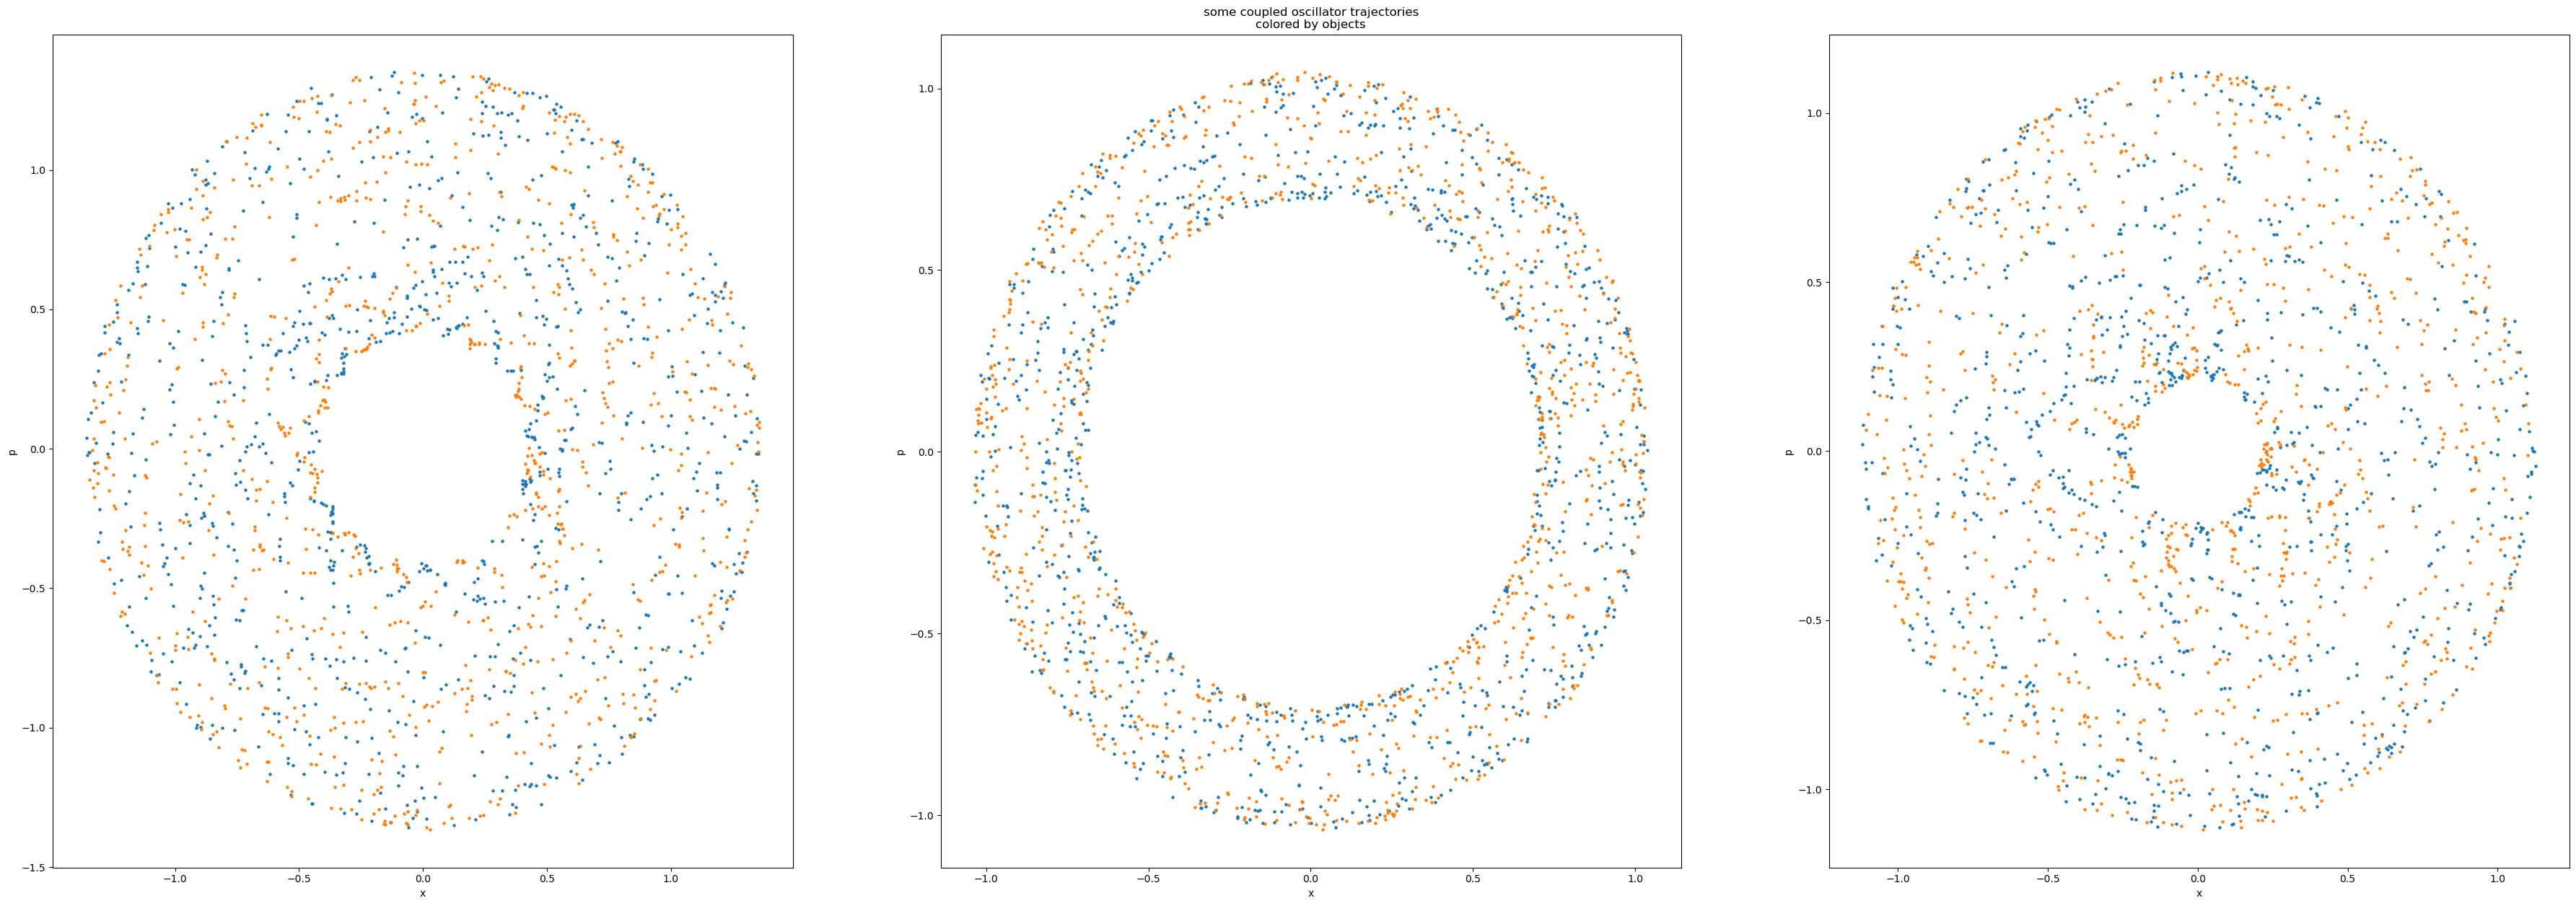

In [3]:
import creating.pendulum as pend
import creating.harmonic_oscillator as ho
import creating.kepler_problem as kp
import creating.double_pendulum as dp
import creating.coupled_oscillator as co


pend.create_trajectories(1000)
ho.create_trajectories(1000)
kp.create_trajectories(1000)
dp.create_trajectories(1000)
co.create_trajectories(1000)

## Use spectral embedding

In [4]:
import utils

### Pendulum

C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


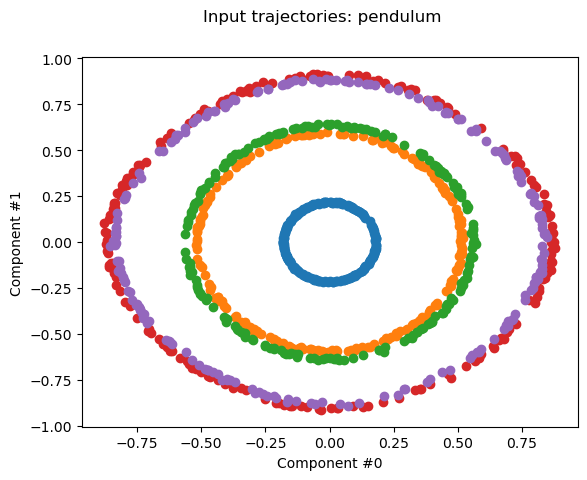

In [5]:
data_p = utils.get_data("pendulum", plot_config=[(0, 1)])

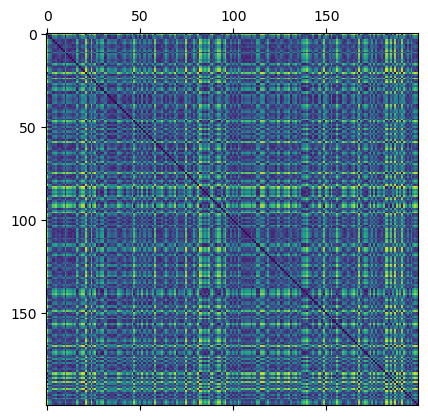

In [6]:
W_P = utils.gen_dist_matrix(data_p)
plt.matshow(W_P)

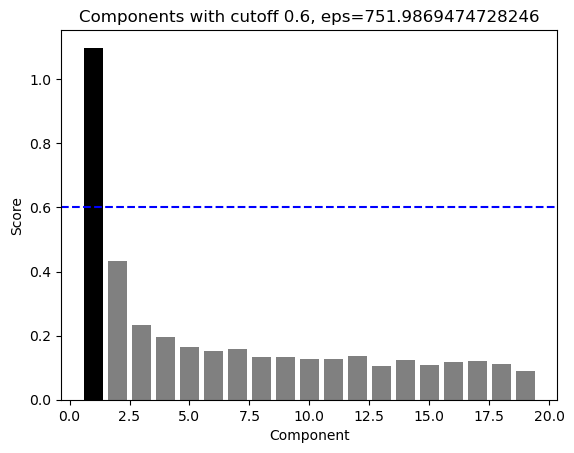

In [7]:
scores, embedding, embed_list = utils.spectral_embedding(W_P, n_neighbors=20)

## Harmonic oscillator

C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


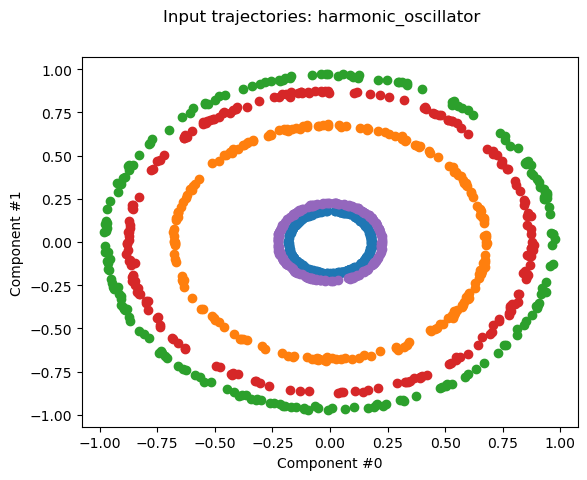

In [8]:
data_h = utils.get_data("harmonic_oscillator", plot_config=[(0, 1)])

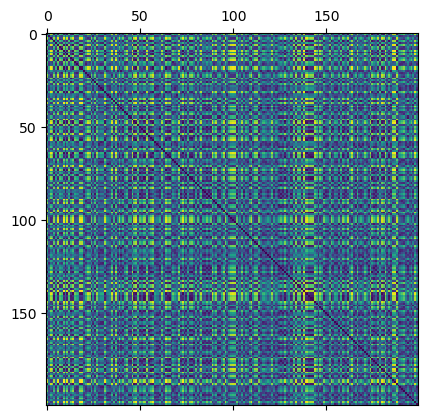

In [9]:
W_H = utils.gen_dist_matrix(data_h)
plt.matshow(W_H)

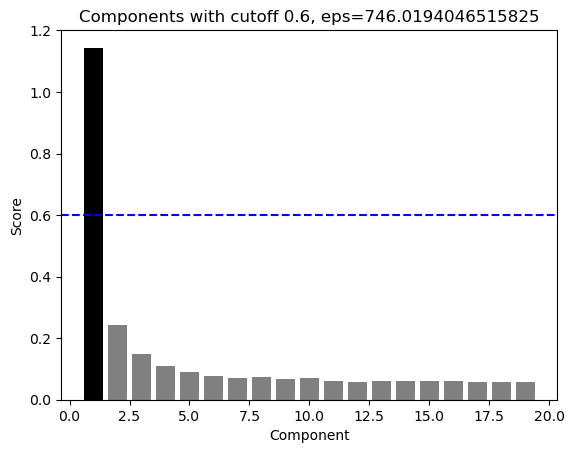

In [10]:
scores, embedding, embed_list = utils.spectral_embedding(W_H, n_neighbors=20)

## Double pendulum

C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


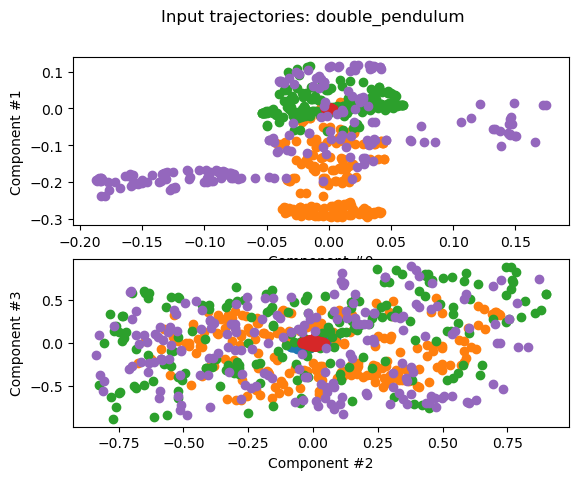

In [11]:
data_dp = utils.get_data("double_pendulum", plot_config=[(0, 1), (2, 3)])

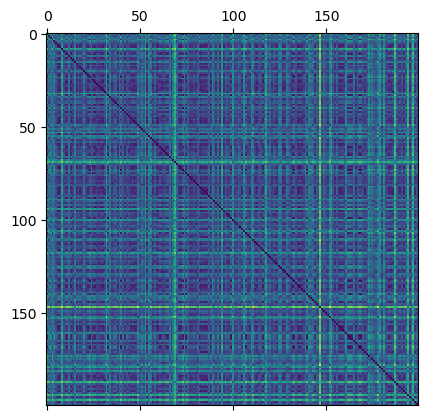

In [12]:
W_DP = utils.gen_dist_matrix(data_dp)
plt.matshow(W_DP)

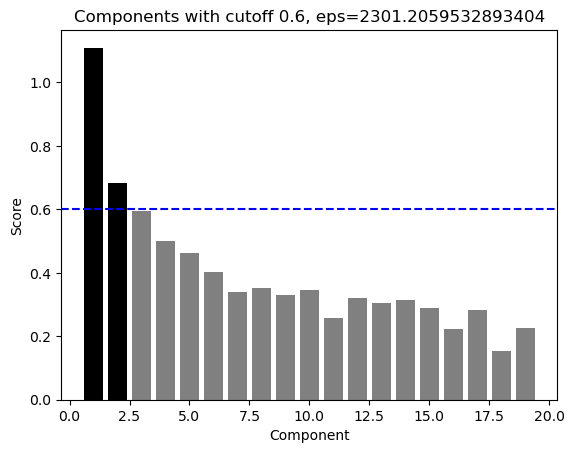

In [46]:
scores, embedding, embed_list = utils.spectral_embedding(W_DP, n_neighbors=20)

## Coupled oscillator

C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


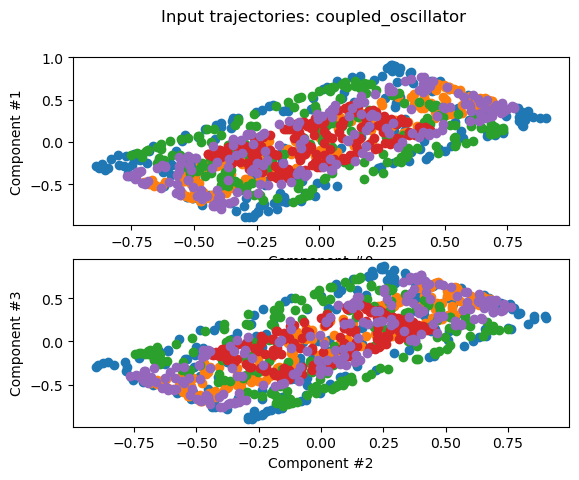

In [14]:
data_co = utils.get_data("coupled_oscillator", plot_config=[(0, 1), (2, 3)])

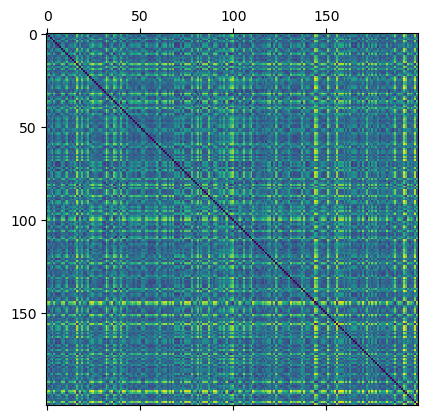

In [15]:
W_CO = utils.gen_dist_matrix(data_co)
plt.matshow(W_CO)

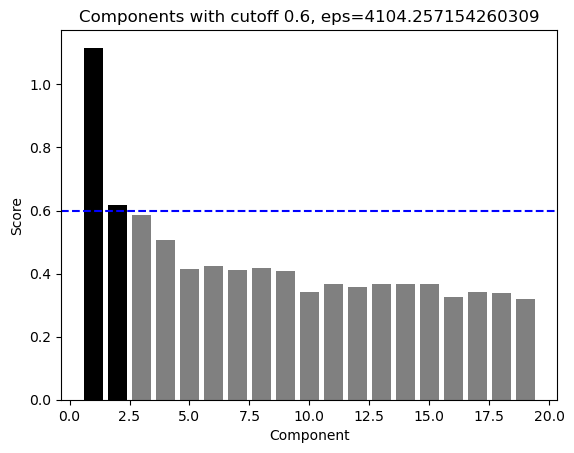

In [43]:
scores, embedding, embed_list = utils.spectral_embedding(W_CO, n_neighbors=25)

## Kepler problem

C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


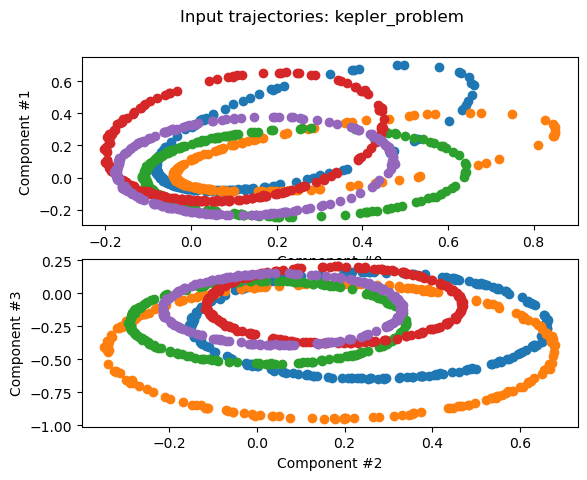

In [17]:
data_kp = utils.get_data("kepler_problem", plot_config=[(0, 1), (2, 3)])

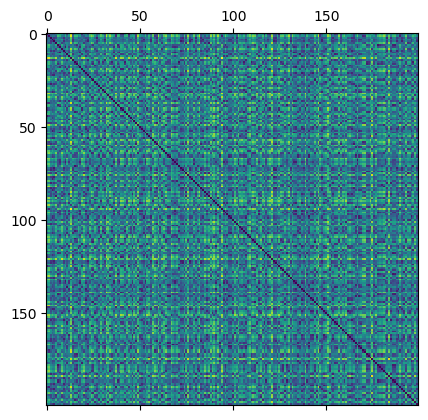

In [18]:
W_KP = utils.gen_dist_matrix(data_kp)
plt.matshow(W_KP)

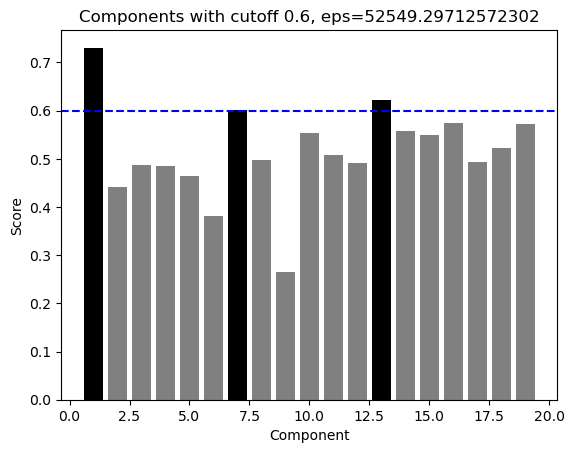

In [19]:
scores, embedding, embed_list = utils.spectral_embedding(W_KP, n_neighbors=197)

## Three body problem

In [20]:
# data_tbp = utils.get_data("three_body_problem", plot_config=[(0, 1), (2, 3)]) # TODO

In [21]:
# W_TBP = utils.gen_dist_matrix(data_tbp)
# plt.matshow(W_TBP)

In [22]:
# scores, embedding, embed_list = utils.spectral_embedding(W_TBP, n_neighbors=40)

## Dependence of embedding size on `n_neighbors`

In [23]:
def calc_embed_sizes(W, n_neighbors_range):
    res = []
    for n_neighbors in tqdm(n_neighbors_range):
        _, _, embed_list = utils.spectral_embedding(W, n_neighbors=n_neighbors, do_plot=False)
        res.append(len(embed_list))
    return res

In [24]:
def try_n_neighbors(W, expected_embed_size: int, experiment_name: str, n_neighbors_range = range(4, 198)):
    embed_sizes = calc_embed_sizes(W, n_neighbors_range)
    colors = ['green' if x == expected_embed_size else 'grey' for x in embed_sizes]
    plt.bar(n_neighbors_range, embed_sizes, color=colors, width=1)
    plt.title(f"Embedding size for {experiment_name} with different n_neighbors. Expected: {expected_embed_size}")

### Pendulum

100%|██████████| 194/194 [00:10<00:00, 19.28it/s]


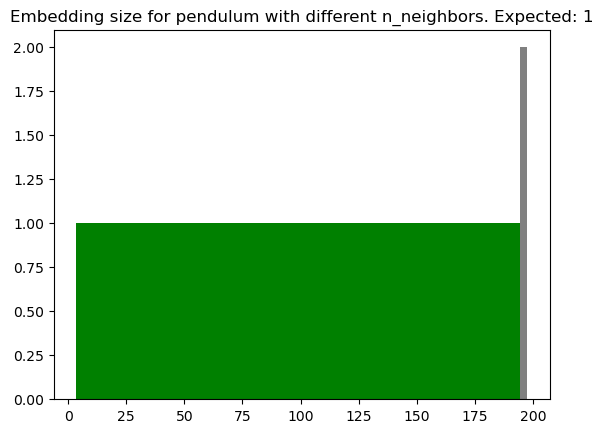

In [25]:
try_n_neighbors(W_P, 1, "pendulum")

100%|██████████| 194/194 [00:07<00:00, 27.71it/s]


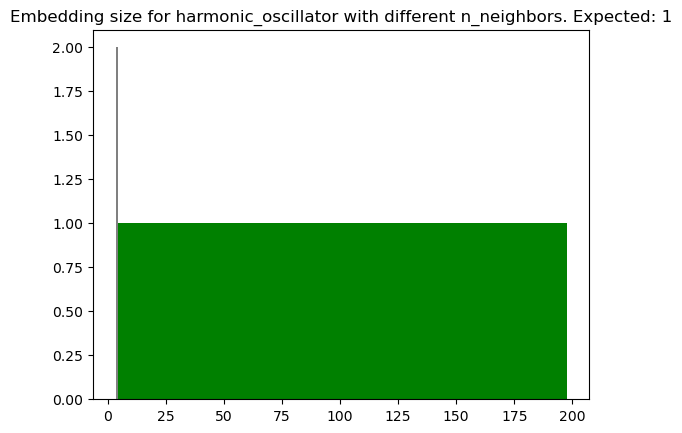

In [26]:
try_n_neighbors(W_H, 1, "harmonic_oscillator")

100%|██████████| 194/194 [00:08<00:00, 22.71it/s]


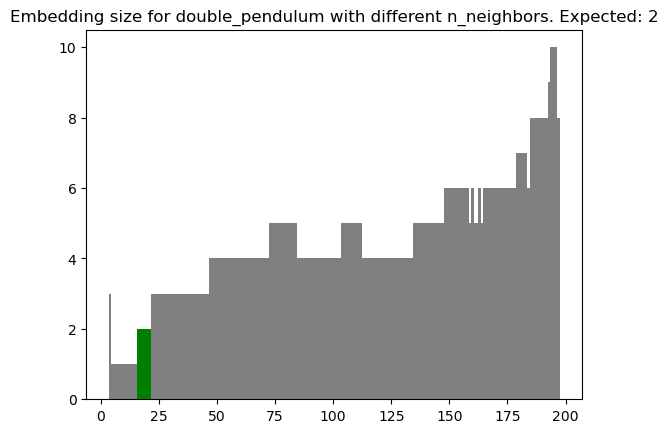

In [27]:
try_n_neighbors(W_DP, 2, "double_pendulum")

100%|██████████| 194/194 [00:07<00:00, 24.76it/s]


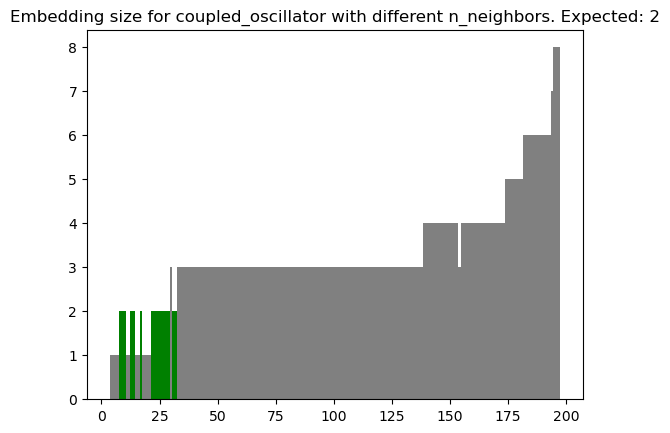

In [28]:
try_n_neighbors(W_CO, 2, "coupled_oscillator")

100%|██████████| 194/194 [00:10<00:00, 19.04it/s]


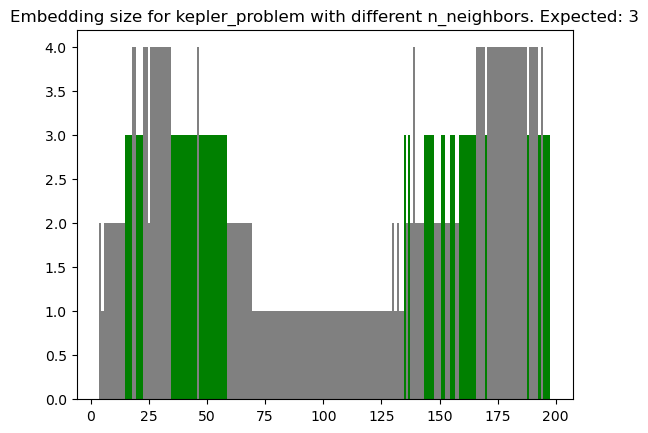

In [29]:
try_n_neighbors(W_KP, 3, "kepler_problem")

## Batch

In [30]:
def calc_embed_sizes_batched(Ws, n_neighbors_range):
    res = []
    for n_neighbors in tqdm(n_neighbors_range):
        tmp = utils.batch_spectral_embedding(Ws, n_neighbors=n_neighbors, do_plot=False)
        embed_size = np.mean([len(x[2]) for x in tmp])
        res.append(embed_size)
    return res

In [31]:
def try_n_neighbors_batched(Ws, expected_embed_size: int, experiment_name: str, n_neighbors_range = range(4, 198)):
    embed_sizes = calc_embed_sizes_batched(Ws, n_neighbors_range)
    colors = ['green' if abs(x - expected_embed_size) < 0.5 else 'grey' for x in embed_sizes]
    plt.bar(n_neighbors_range, embed_sizes, color=colors, width=1)
    plt.title(f"Mean embedding size for {experiment_name} with different n_neighbors. Expected: {expected_embed_size}")

### Pendulum

100%|██████████| 194/194 [00:45<00:00,  4.22it/s]


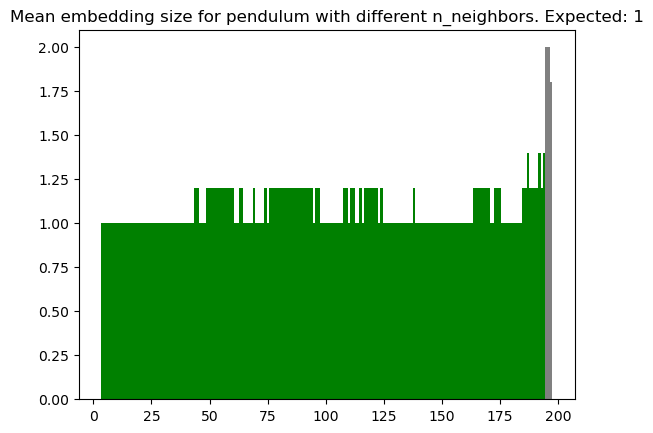

In [32]:
data_p_batches = utils.batch_get_data("pendulum")
Ws_p = [utils.gen_dist_matrix(x) for x in data_p_batches]
try_n_neighbors_batched(Ws_p, 1, "pendulum")

### Harmonic oscillator

100%|██████████| 194/194 [00:40<00:00,  4.85it/s]


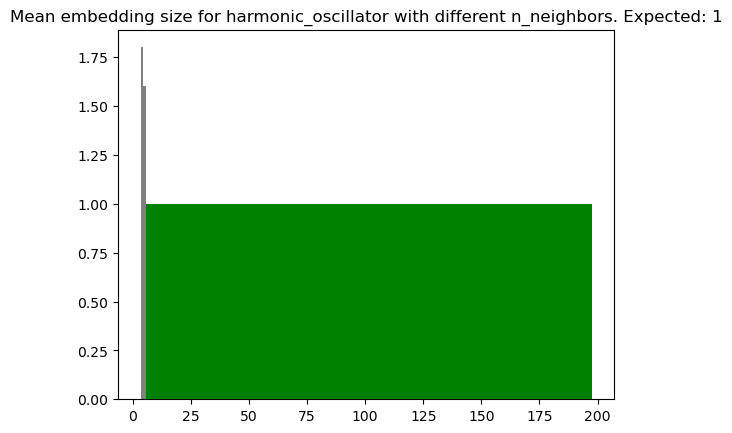

In [33]:
data_h_batches = utils.batch_get_data("harmonic_oscillator")
Ws_h = [utils.gen_dist_matrix(x) for x in data_h_batches]
try_n_neighbors_batched(Ws_h, 1, "harmonic_oscillator")

### Double pendulum

100%|██████████| 194/194 [00:46<00:00,  4.17it/s]


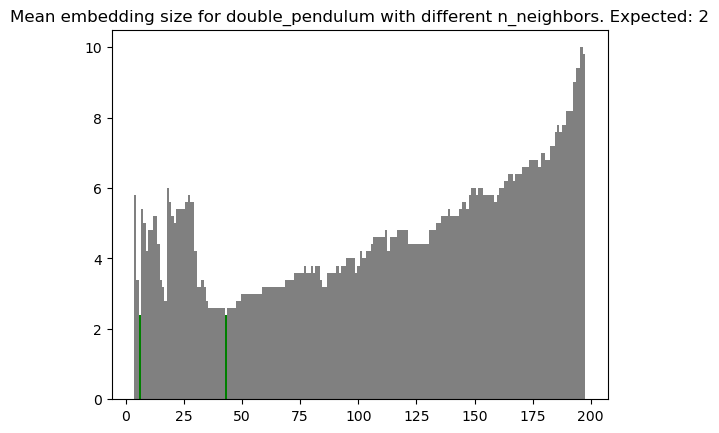

In [34]:
data_dp_batches = utils.batch_get_data("double_pendulum")
Ws_dp = [utils.gen_dist_matrix(x) for x in data_dp_batches]
try_n_neighbors_batched(Ws_dp, 2, "double_pendulum")

### Coupled oscillator

100%|██████████| 194/194 [00:39<00:00,  4.92it/s]


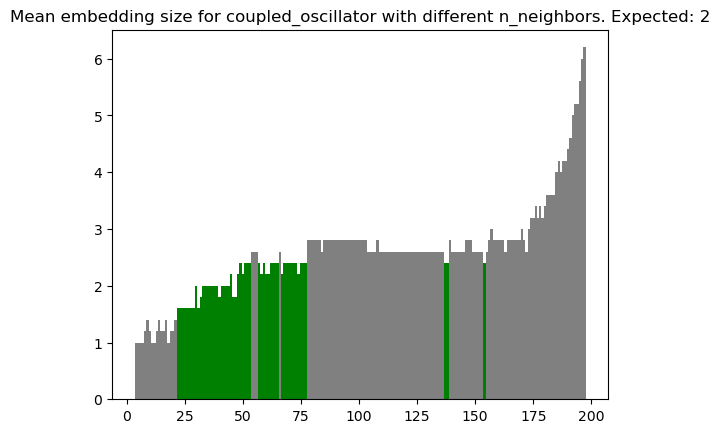

In [35]:
data_co_batches = utils.batch_get_data("coupled_oscillator")
Ws_co = [utils.gen_dist_matrix(x) for x in data_co_batches]
try_n_neighbors_batched(Ws_co, 2, "coupled_oscillator")

### Kepler problem

100%|██████████| 194/194 [00:45<00:00,  4.26it/s]


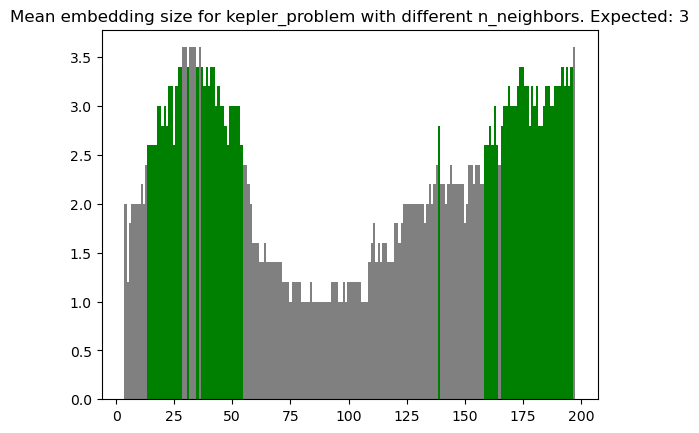

In [36]:
data_kp_batches = utils.batch_get_data("kepler_problem")
Ws_kp = [utils.gen_dist_matrix(x) for x in data_kp_batches]
try_n_neighbors_batched(Ws_kp, 3, "kepler_problem")